In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
from google.colab import files

In [4]:
data = files.upload()

Saving AMZN.csv to AMZN (1).csv


In [5]:
data = pd.read_csv("AMZN.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-21,47.878502,48.060001,47.272999,47.664501,47.664501,63290000
1,2017-08-22,47.776001,48.396500,47.775002,48.345001,48.345001,55000000
2,2017-08-23,47.969002,48.099998,47.709999,47.900002,47.900002,53366000
3,2017-08-24,47.870998,47.950001,47.056999,47.622501,47.622501,103914000
4,2017-08-25,47.799999,47.881001,47.205002,47.263000,47.263000,66496000
...,...,...,...,...,...,...,...
959,2021-06-14,167.341507,169.250000,166.774994,169.193497,169.193497,51394000
960,2021-06-15,169.199997,169.849503,168.155502,169.156494,169.156494,48524000
961,2021-06-16,169.600006,171.317505,168.026505,170.762497,170.762497,84056000
962,2021-06-17,170.158997,174.860001,170.050003,174.462006,174.462006,102730000


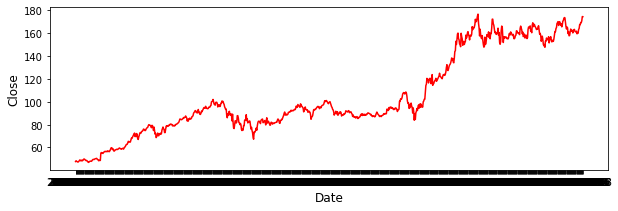

In [6]:
plt.figure(figsize=(10,3))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.plot(data.Date, data.Close,color='red')

In [7]:
# 1. Filter out the closing market price data
close_data = data.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data2.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=10)

Epoch 1/10
615/615 [==============================] - 21s 30ms/step - loss: 0.0018
Epoch 2/10
615/615 [==============================] - 17s 27ms/step - loss: 7.2229e-04
Epoch 3/10
615/615 [==============================] - 18s 29ms/step - loss: 6.3658e-04
Epoch 4/10
615/615 [==============================] - 17s 28ms/step - loss: 4.1816e-04
Epoch 5/10
615/615 [==============================] - 17s 28ms/step - loss: 4.1903e-04
Epoch 6/10
615/615 [==============================] - 17s 27ms/step - loss: 3.7562e-04
Epoch 7/10
615/615 [==============================] - 17s 27ms/step - loss: 3.4356e-04
Epoch 8/10
615/615 [==============================] - 17s 28ms/step - loss: 3.2756e-04
Epoch 9/10
615/615 [==============================] - 18s 29ms/step - loss: 3.2343e-04
Epoch 10/10
615/615 [==============================] - 17s 27ms/step - loss: 3.0234e-04


In [10]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


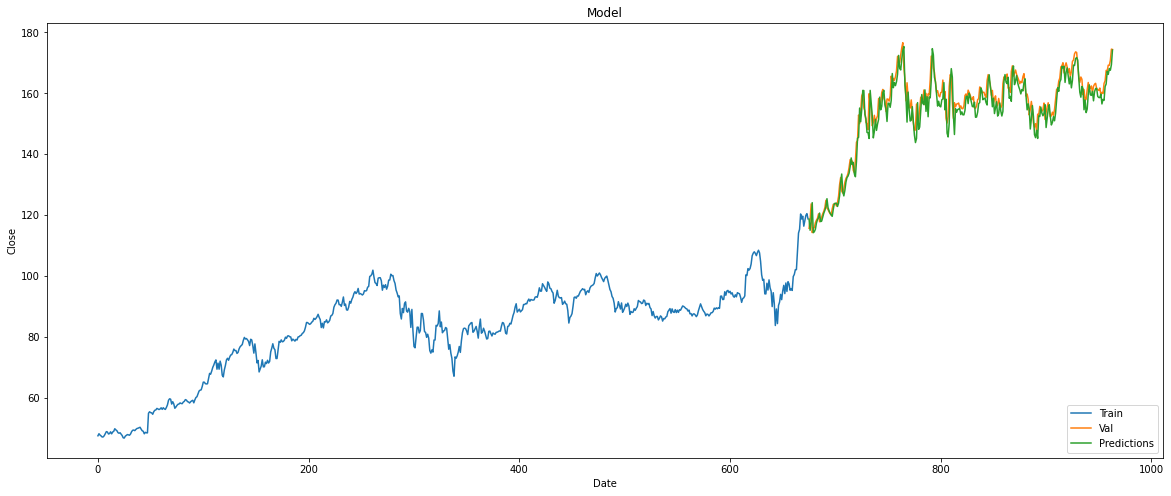

In [11]:
#Predictions
train = data[:training_data_len]
valid = data[training_data_len:]
 
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

In [12]:
table = pd.DataFrame(data=valid, columns=['Close','Predictions'])
table

,Close,Predictions
675,115.704002,118.708626
676,118.635498,115.057739
677,123.699997,117.988068
678,114.302002,124.121902
679,115.799500,114.266701
...,...,...
959,169.193497,166.176422
960,169.156494,168.110672
961,170.762497,167.546188
962,174.462006,169.358276
